# 1. Coletar Dados

Nosso objetivo é analisar os dados de um jogo online de apostas na roleta.
Acesso em: https://blaze.bet.br/pt/games/double

In [145]:
from IPython.display import IFrame
IFrame('https://www.brasil247.com/sites/wp-content/uploads/sites/101/2023/04/blaze-double.png.webp', width=700, height=350)

## 1.1 Collector
Utilizamos um **Collector.sh** para extrair os dados da API e compilar um CSV.
A resposta a API é pagina e o collector automatiza as chamadas para a API nos proporcionando um volume maior de dados.

Acesso em: https://github.com/rafaell-cavalcanti/mpes-public/tree/main/data-science


## 1.2 Dados

In [144]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rafaell-cavalcanti/mpes-public/refs/heads/main/data-science/rounds-7-days.csv')
display(df.head())

,id,created_at,color,roll,server_seed
0,M9rKE5aXk6,2025-06-27T23:59:50.904Z,2,8,4b524bfb72267444d2d34139d6d74441d0251bd480469b...
1,AXlO9oXm1O,2025-06-27T23:59:20.845Z,2,11,0fe5651030194145c415db7b675d410ffad68dd77402cc...
2,OWldGO4nk3,2025-06-27T23:58:50.785Z,2,12,aca5ba78598da9f5caa9b33407b111e68664b772e9d4a5...
3,3elYvoeJrL,2025-06-27T23:58:20.726Z,2,14,f9e380f8df82305faf5bd89fc1edf86c21ea2232776daf...
4,GR1pnNDPl5,2025-06-27T23:57:50.659Z,0,0,51d22c0cbed29b3cb594f0ca8053827fdeb87e7ab50ab6...


# 2. Realizar pré-processamento dos dados

## 2.1 Definição de Tipos
Converter `created_at` de string para datetime

In [78]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20900 entries, 0 to 20899
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   id           20900 non-null  object             
 1   created_at   20900 non-null  datetime64[ns, UTC]
 2   color        20900 non-null  int64              
 3   roll         20900 non-null  int64              
 4   server_seed  20900 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 816.5+ KB


Criar coluna para identificação dos dados no **Loop Humano**

In [82]:
df['color_name'] = df['color'].map({0: 'white', 1: 'red', 2: 'black'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20900 entries, 0 to 20899
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   id           20900 non-null  object             
 1   created_at   20900 non-null  datetime64[ns, UTC]
 2   color        20900 non-null  int64              
 3   roll         20900 non-null  int64              
 4   server_seed  20900 non-null  object             
 5   color_name   20900 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 979.8+ KB


## 2.2 Tratamento de dados ausentes
Adicionar a coluna `last_occurrency` baseado em dados histórios. Esta coluna demostra em quantas rodadas aconteceu a última ocorrencia da cor



In [86]:
df = df.sort_values(by='created_at').reset_index(drop=True)
df['last_occurrency'] = df.groupby('color').apply(lambda x: x.index.to_series().diff()).reset_index(level=0, drop=True).fillna(0).astype(int)
df.head()

/tmp/ipython-input-86-239833208.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['last_occurrency'] = df.groupby('color').apply(lambda x: x.index.to_series().diff()).reset_index(level=0, drop=True).fillna(0).astype(int)


,id,created_at,color,roll,server_seed,color_name,ago,last_occurrency
0,WG17gGEP1Z,2025-06-20 16:38:29.500000+00:00,1,6,0712a8070f6f704239ea4fea9886ef14004a1ae5f73517...,red,0,0
1,BylLoLd5kG,2025-06-20 16:38:59.558000+00:00,2,11,71768584638c69e157004f822d750ae22153aa7af72d55...,black,0,0
2,gM19wRoLlA,2025-06-20 16:39:29.615000+00:00,2,8,f7b8c06f98d8627c404cb71e320fb601cd96e72754d0e5...,black,1,1
3,xmlNDNKW1v,2025-06-20 16:39:59.672000+00:00,2,13,4ce25f438ea5caa4b94c99e68207c26d81a249b92349aa...,black,1,1
4,7dlEqboylv,2025-06-20 16:40:29.729000+00:00,2,11,08065df953be7951cc8b1c74f18d1cc654aff765874d07...,black,1,1


## 2.3 Normalização de distretização
Os dados não precisam de normalização

## 2.4 Limpeza dos dados (Univariado)
Vamos eliminar os registros do campo `last_occurency` onde o valor é 0 (zero).

In [90]:
df = df[df['last_occurrency']>0]
df.head()

,id,created_at,color,roll,server_seed,color_name,ago,last_occurrency
2,gM19wRoLlA,2025-06-20 16:39:29.615000+00:00,2,8,f7b8c06f98d8627c404cb71e320fb601cd96e72754d0e5...,black,1,1
3,xmlNDNKW1v,2025-06-20 16:39:59.672000+00:00,2,13,4ce25f438ea5caa4b94c99e68207c26d81a249b92349aa...,black,1,1
4,7dlEqboylv,2025-06-20 16:40:29.729000+00:00,2,11,08065df953be7951cc8b1c74f18d1cc654aff765874d07...,black,1,1
5,QqlP6PLP1z,2025-06-20 16:40:59.792000+00:00,2,8,bc98384d81b666547130fc84745973f8be2b8e17a60323...,black,1,1
6,EV1e5ywR1o,2025-06-20 16:41:29.849000+00:00,2,14,408888d9c01d2fe5b0a22ea3f165709acaae245f018c37...,black,1,1


Vamos filtrar somente a cor branca

In [92]:
df_color_white = df[(df['color_name'] == 'white')]
df_color_white.head()


,id,created_at,color,roll,server_seed,color_name,ago,last_occurrency
30,96rXvGWVkO,2025-06-20 16:53:31.250000+00:00,0,0,7689d1d651202a14d35f0ef215ac84fe2fd975005ae2eb...,white,5,5
32,9YrJzK2wrK,2025-06-20 16:54:31.371000+00:00,0,0,9bdb710b435224281450314ed10c12680aa9e979e8974d...,white,2,2
51,GR1p0EZP15,2025-06-20 17:04:02.644000+00:00,0,0,769dbde3a05359105726e7b4113f44ce28446e2f34e7e1...,white,19,19
64,V5k0QemGlY,2025-06-20 17:10:33.418000+00:00,0,0,2ec4aa302bd0de51e9b0e72d5ca08ad46e31757159484e...,white,13,13
78,4J1m7LPelj,2025-06-20 17:17:34.240000+00:00,0,0,fc88dec72a9308abebfc0007764703d40ab92eddb370fb...,white,14,14


# Estatistica Descritiva
## Descobrir os outliners

In [125]:
df_color_white = df[(df['color_name'] == 'white')]
df_color_red = df[(df['color_name'] == 'red')]
df_color_black = df[(df['color_name'] == 'black')]


<Axes: >

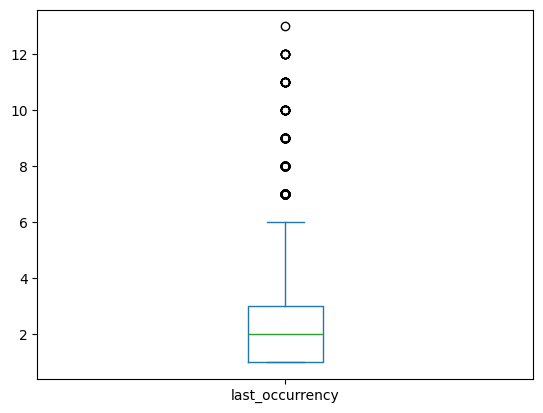

In [131]:
df_color_black['last_occurrency'].plot(kind='box', label="Black")

<Axes: >

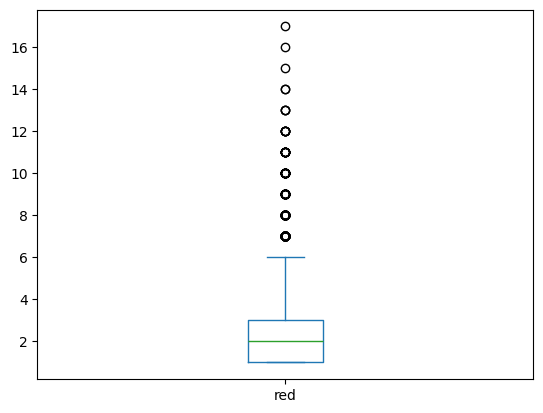

In [134]:
df_color_red['last_occurrency'].plot(kind='box', label="Red")

<Axes: >

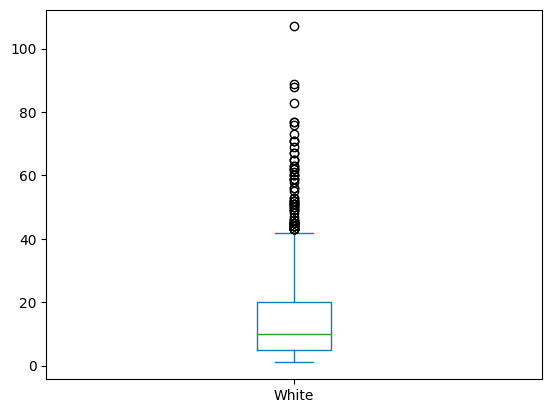

In [135]:
df_color_white['last_occurrency'].plot(kind='box', label="White")

## Comparação entre Preto e Vermelho

### A hipótese é que preto e vermelho tem uma distribuição semelhantes

1.   Chegar a normalidade de preto e vermelho
2.   Se um dos dois não seguirem a normal, rodar o Manwhitney entre os dois





In [148]:
from scipy.stats import shapiro

shapiro_black = shapiro(df_color_black['last_occurrency'])
shapiro_red = shapiro(df_color_red['last_occurrency'])

print(f"Shapiro-Wilk test for Black color: Statistic={shapiro_black.statistic:.4f}, p-value={shapiro_black.pvalue:.4f}")
print(f"Shapiro-Wilk test for Red color: Statistic={shapiro_red.statistic:.4f}, p-value={shapiro_red.pvalue:.4f}")

Shapiro-Wilk test for Black color: Statistic=0.7331, p-value=0.0000
Shapiro-Wilk test for Red color: Statistic=0.7260, p-value=0.0000


In [150]:

from scipy.stats import mannwhitneyu

mannwhitney_red_black = mannwhitneyu(df_color_red['last_occurrency'], df_color_black['last_occurrency'])

print(f"Mann-Whitney U test between Red and Black colors: Statistic={mannwhitney_red_black.statistic:.4f}, p-value={mannwhitney_red_black.pvalue:.4f}")


Mann-Whitney U test between Red and Black colors: Statistic=47602161.0000, p-value=0.7444


### Conclução: As duas distribuições, preto e vermelho, são similares

## Probabilidade
Probabilidade de cada cor e comparação comparação com a informação do site.


In [119]:
color_percentages = df['color_name'].value_counts(normalize=True) * 100
display(df['color_name'].value_counts())
display(color_percentages)


,count
color_name,
black,9775
red,9715
white,1407


,proportion
color_name,
black,46.777049
red,46.489927
white,6.733024


## 4 Análise de hipóteses
A hipótese é que o última ocorrências das corres brancas segue uma distribuição normal

<Axes: >

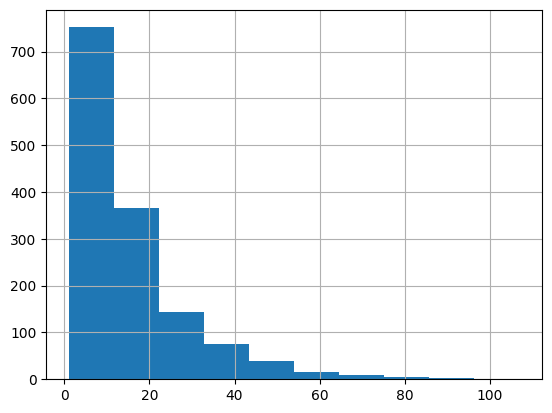

In [139]:
import numpy as np
df_color_white['last_occurrency'].hist()


Visualmente não segue distribuição normal, mas vamos conferir com Shapiro

In [140]:
from scipy.stats import shapiro
shapiro(df_color_white['last_occurrency'])

ShapiroResult(statistic=np.float64(0.8190670473091166), pvalue=np.float64(4.17790710504087e-37))

Valor acima de .05 não valida a hipótese null, portante não corresponde a uma distribuição normal

## 4.1 Hipótese Distribuição Normal com Log
Nossa hipótese é que transformando os dado da coluna last_occurrency para logaritma, a distribuição segue uma função normal

<Axes: >

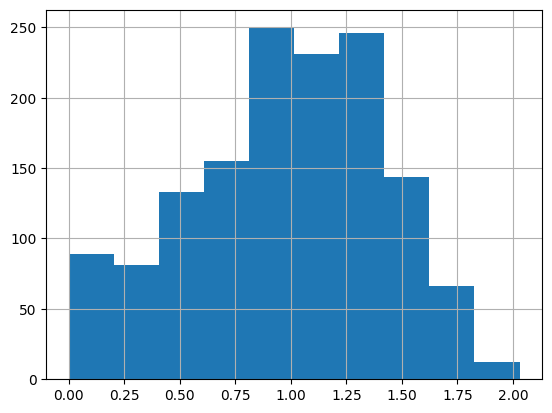

In [141]:
df_color_white['last_occurrency'].apply(np.log10).hist()

In [143]:
shapiro(df_color_white['last_occurrency'].apply(np.log10))

ShapiroResult(statistic=np.float64(0.9716079584275814), pvalue=np.float64(5.125376029301037e-16))

## Conclusões
Descobrimos que as horas brancas nesse jogo:


*   A propabilidade de sair é de 6% como esta informado no site
*   A média é 10 vezes
*   O percentiu inferior é 5 e superior 20
*   Os outliners estão acima de 44
*   E tem uma distribuição normal depois de transformado para escala logaritma.

